In [17]:
%tensorflow_version 1.x
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt


In [18]:
# 폴더 생성됨
# 읽어서 변수저장
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


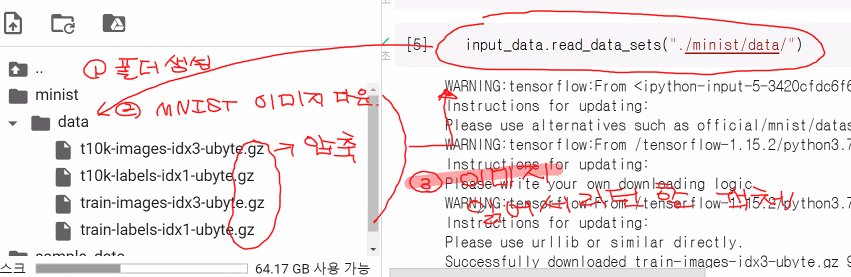

In [19]:
# 학습데이터 중 이미지 1개 리턴
# 0 흰색 / 1 검정 / 0~1 그 외 
image1 = mnist.train.next_batch(1)

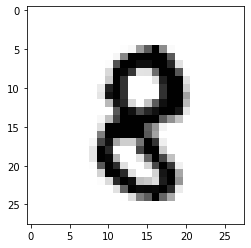

In [27]:
# one hot encoding 00001 이렇게 되어있어야 분류가 가능함 
# -> 이미지 로딩할 때 one_hot=True 해야함
image1[1]

plt.imshow(image1[0].reshape((28,28)),cmap=plt.cm.gray_r)

In [22]:
# X에는 이미지 저장 / y에는 lable저장
X, y = mnist.train.next_batch(1)

# 몇줄몇칸인지 차원배열 적어줘야함
plt.imshow(X.reshape((28,28)),cmap=plt.cm.gray_r)

In [28]:
# x에 이미지 10개 
X, y = mnist.train.next_batch(10)

In [31]:
# 10, 784
X.shape

(10, 784)

In [35]:
initializer = tf.contrib.layers.xavier_initializer()

w0 = tf.Variable(initializer([784,200]))
b0 = tf.Variable(initializer([200]))

In [36]:
hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)

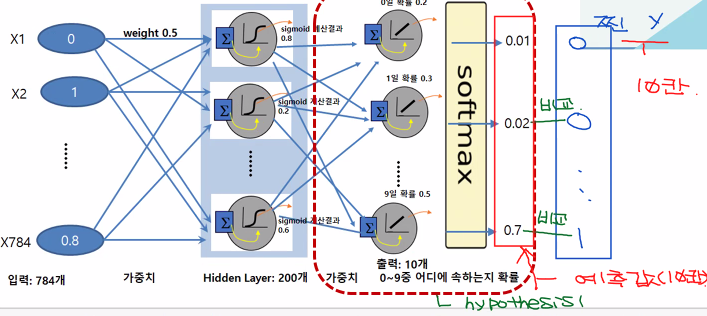

In [37]:
w1 = tf.Variable(initializer([200,10]))
b1 = tf.Variable(initializer([10]))

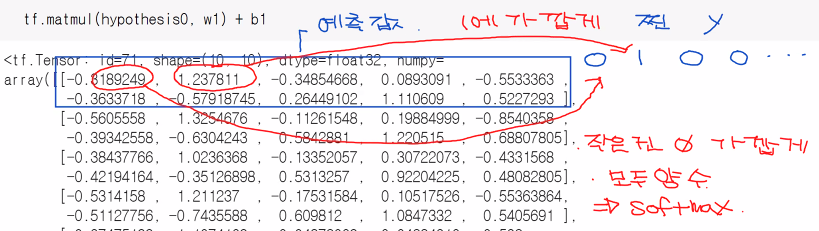

In [41]:
# 작은건 0에 가깝게 / 큰건 1에 가깝게 모두 양수 처리 = softmax
hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

In [43]:
# mnist 전체 이미지수 = 55000
mnist.train.num_examples

# 전체 이미지를 한번에 학습하기에는 메모리 소요가 많으므로
# 100개씩 나눠 550번 학습 진행 55000/100 = 550

# 전체 이미지 개수 100 나눠 전체 이미지를 학습할 때 까지 반복횟수 계산

55000

In [44]:
optimizer = tf.train.AdamOptimizer(0.001)

In [55]:
# 10번 더 반복
for step in range(10):
  print('='*100)
  print('step=',step)
  print('='*100)

  for i in range(550):
    print('='*100)
    print("i=",i)

    # 100개의 이미지 리턴
    X, y = mnist.train.next_batch(100)

    with tf.GradientTape() as tape:
      hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
      hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

      # 오차
      cost = -tf.reduce_mean(y*tf.log(hypothesis1))
      print('오차=',cost)
      print('='*100)

      # 기울기
      grads = tape.gradient(cost,[w0,w1,b0,b1])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
오차= tf.Tensor(0.0047853985, shape=(), dtype=float32)
i= 402
오차= tf.Tensor(0.011402494, shape=(), dtype=float32)
i= 403
오차= tf.Tensor(0.0036459947, shape=(), dtype=float32)
i= 404
오차= tf.Tensor(0.00710982, shape=(), dtype=float32)
i= 405
오차= tf.Tensor(0.0070188437, shape=(), dtype=float32)
i= 406
오차= tf.Tensor(0.002684338, shape=(), dtype=float32)
i= 407
오차= tf.Tensor(0.013141991, shape=(), dtype=float32)
i= 408
오차= tf.Tensor(0.00492196, shape=(), dtype=float32)
i= 409
오차= tf.Tensor(0.010020682, shape=(), dtype=float32)
i= 410
오차= tf.Tensor(0.0068140263, shape=(), dtype=float32)
i= 411
오차= tf.Tensor(0.0052522677, shape=(), dtype=float32)
i= 412
오차= tf.Tensor(0.008431526, shape=(), dtype=float32)
i= 413
오차= tf.Tensor(0.010586008, shape=(), dtype=float32)
i= 414
오차= tf.Tensor(0.007416829, shape=(), dtype=float32)
i= 415
오차= tf.Tensor(0.0037816286, shape=(), dtype=float32)
i= 416
오차= tf.Tensor(0.008191793, shape=(), dtype=float32)
i= 417
오차= tf.Tensor(0.

In [59]:
# 성능측정 이미지
test_images = mnist.test.images[0:1]

hypothesis0 = tf.sigmoid(tf.matmul(test_images,w0)+b0)

# 예측 = hypothesis0이용
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0,w1)+b1)

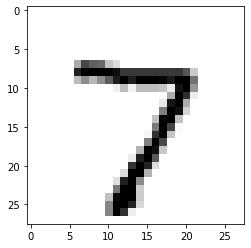

In [65]:
plt.imshow(test_images.reshape(28,28)).cmap=plt.cm.gray_r

# 텐서플로 2.x

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.datasets import mnist

(X_train, y_ytrain),(X_test, y_test) = mnist.load_data()
print('학습 셋 이미지 수  {}', format(X_train.shape[0]))
print('테스트 셋 이미지 수 {}', format(X_test.shape[0]))

11501568/11490434 [==============================] - 0s 0us/step
학습 셋 이미지 수  {} 60000
테스트 셋 이미지 수 {} 10000


In [3]:
from sklearn.preprocessing import OneHotEncoder

# 인코딩할 객체
enc = OneHotEncoder()

# y_train이 몇가지 류인지 파악

In [ ]:
from